In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
'''1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset.'''

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

In [4]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
# Select features and target variable
features = diamonds[["carat", "depth", "table", "x", "y", "z"]]
target = diamonds["price"]

In [6]:
# Handle missing values (if any)
features = features.dropna()
target = target[features.index]

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [10]:
# Fit the multiple linear regression model
model = LinearRegression()
LinearRegression()

LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions
y_pred = model.predict(X_test)

In [15]:
# Calculate residuals
residuals = y_test - y_pred

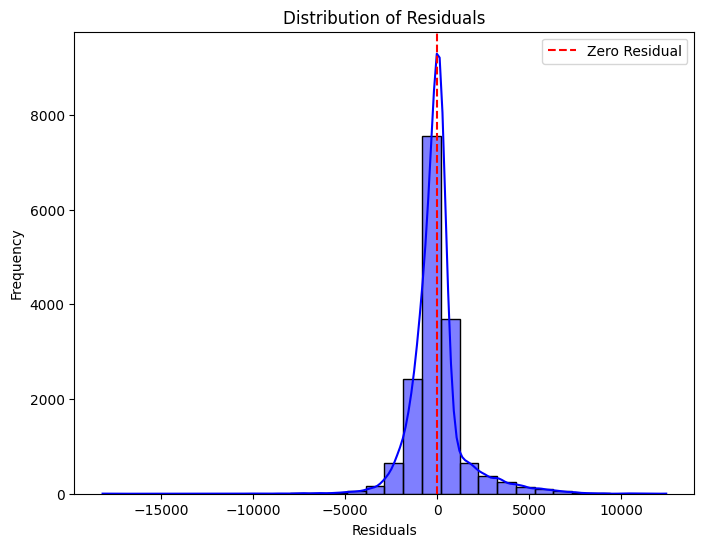

In [16]:
# Visualize the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="blue")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', label='Zero Residual')
plt.legend()
plt.show()

In [17]:
''' Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Squared Error (MSE): 2127724.6098
Mean Absolute Error (MAE): 886.7702
Root Mean Squared Error (RMSE): 1458.6722


<Figure size 1200x800 with 0 Axes>

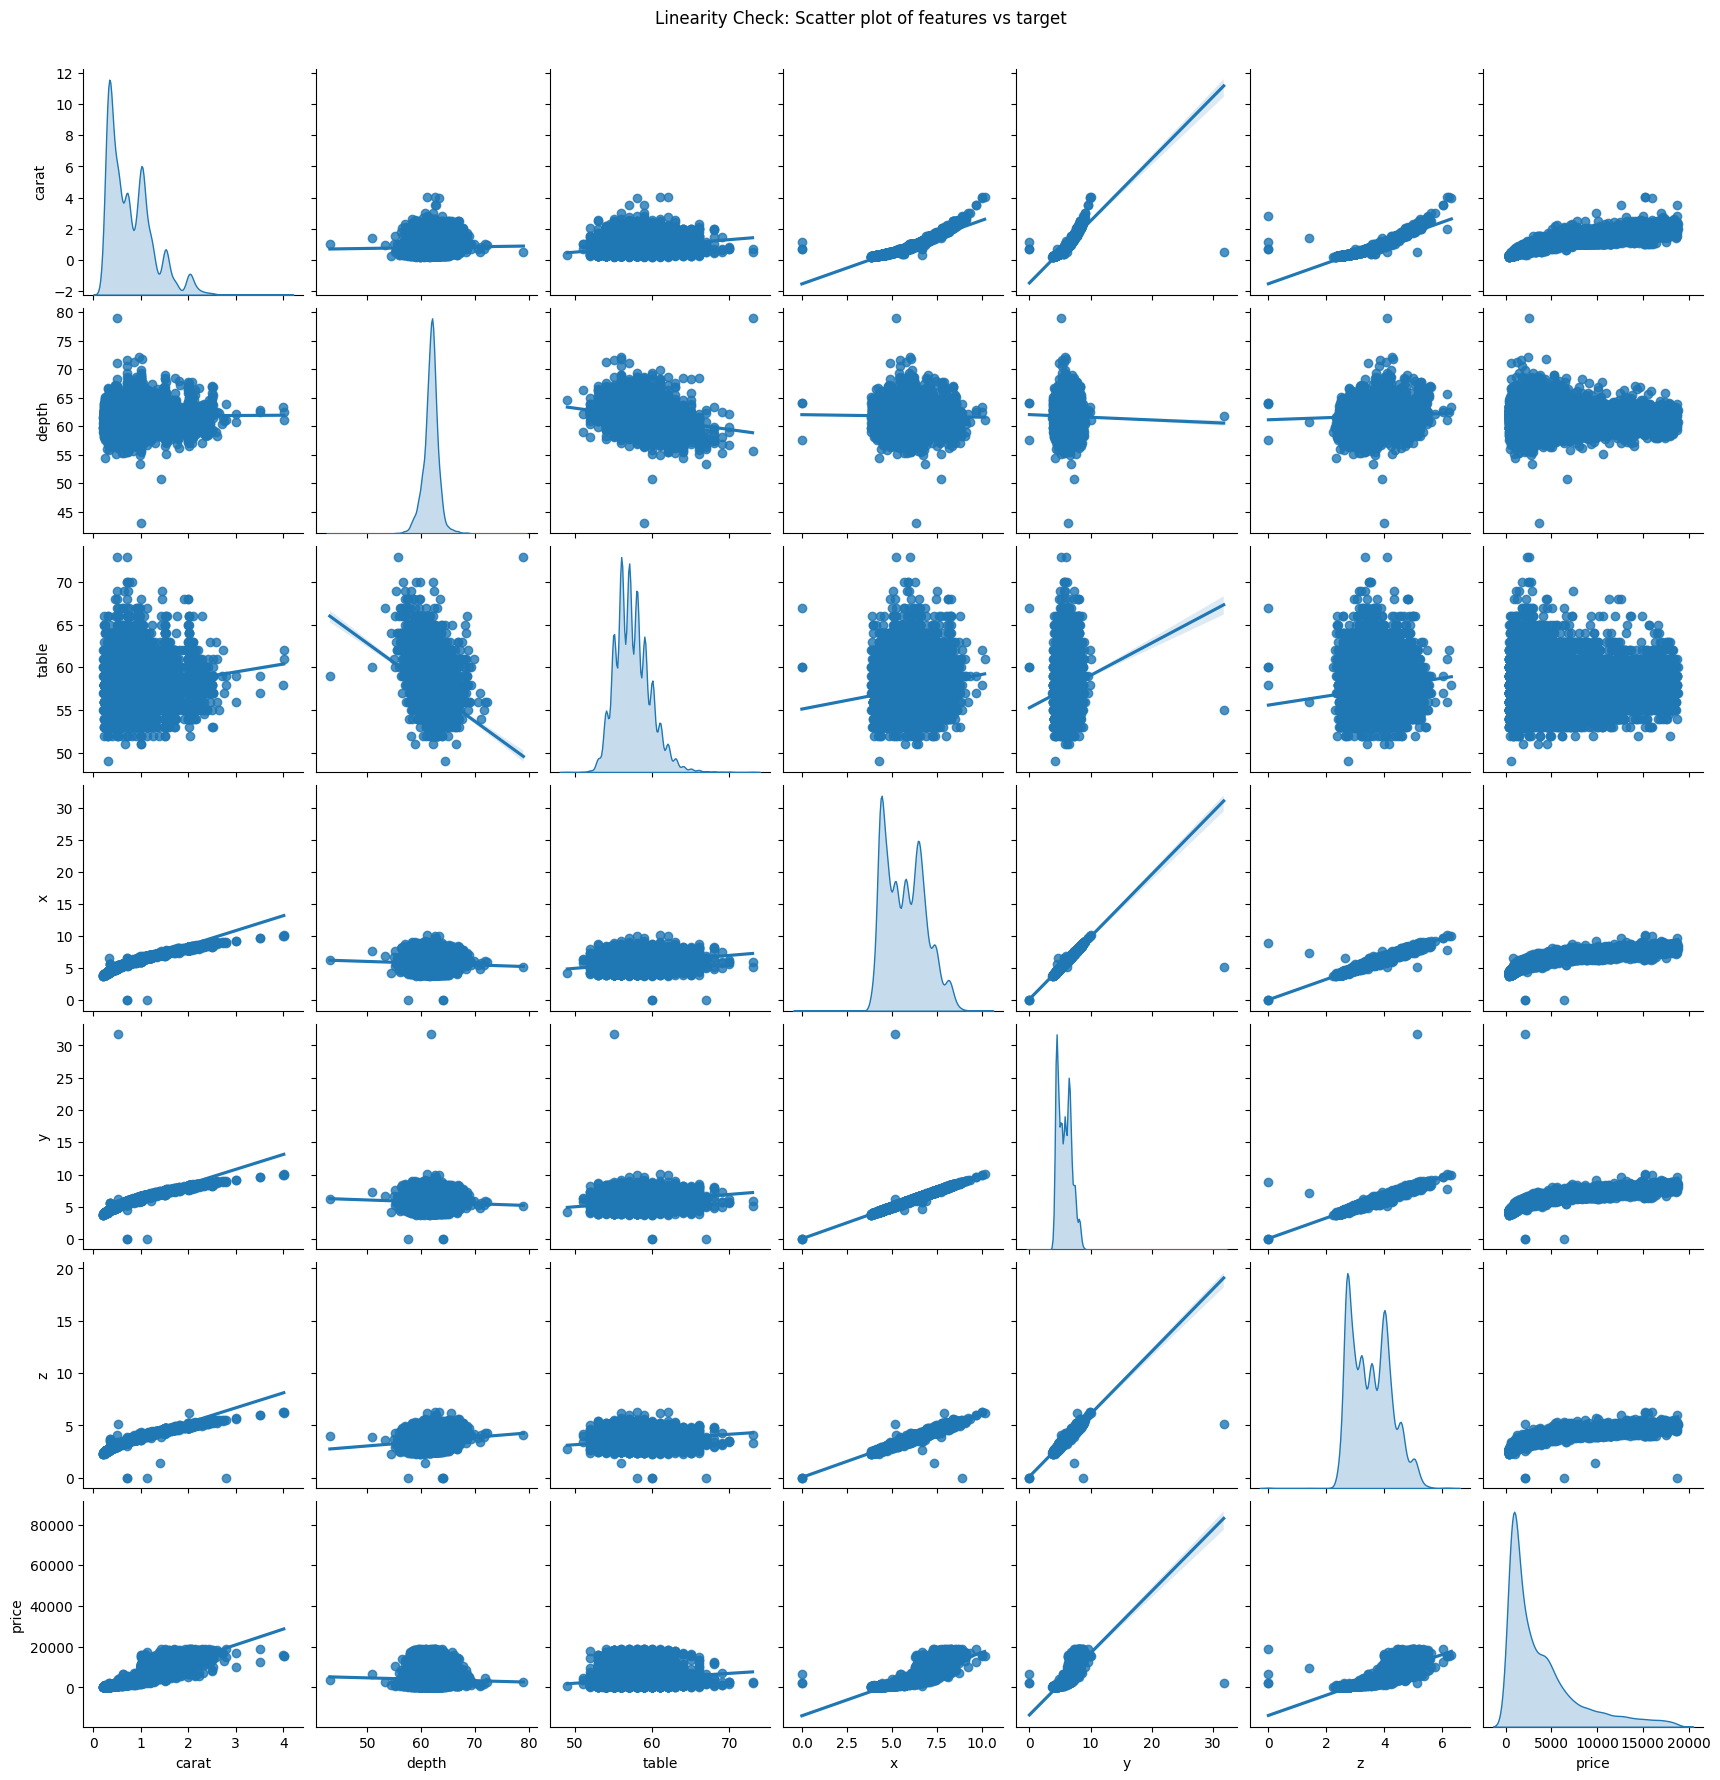

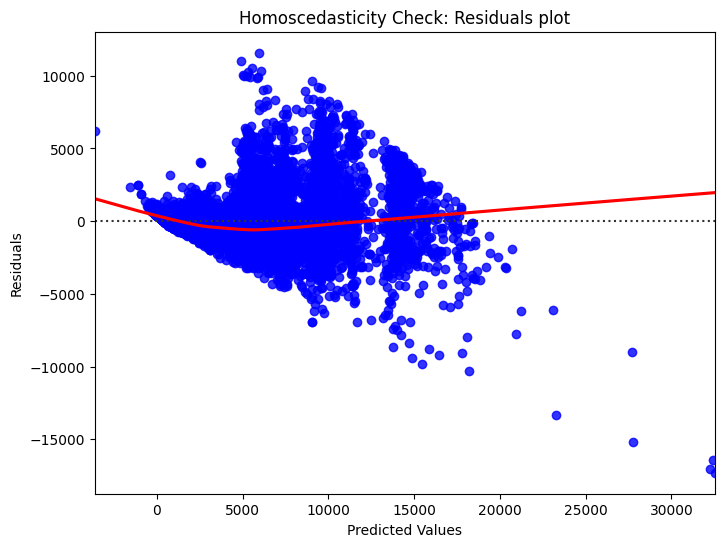

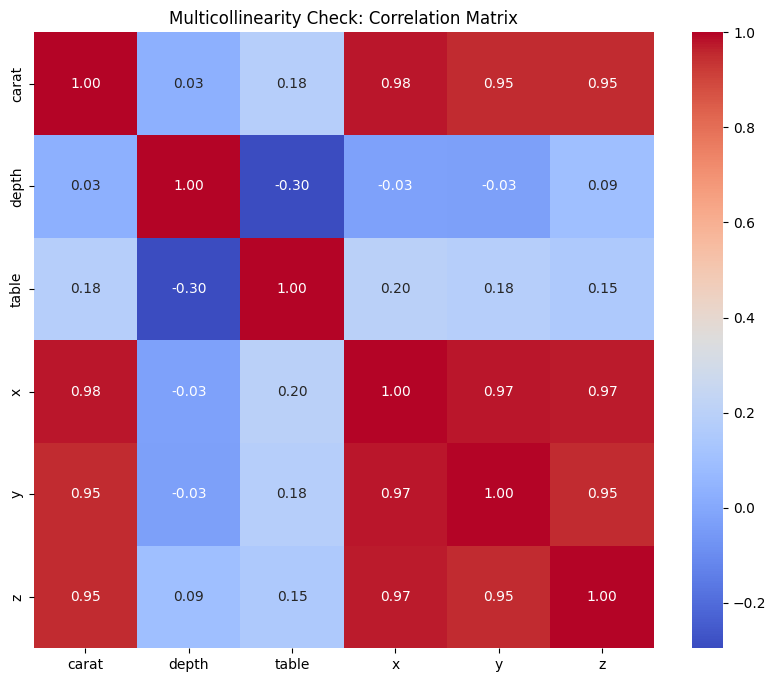

In [19]:
'''3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity'''
# 1. Check Linearity: Scatter plot of features vs. target
plt.figure(figsize=(12, 8))
sns.pairplot(pd.concat([X_test, y_test], axis=1), kind="reg", diag_kind="kde")
plt.suptitle("Linearity Check: Scatter plot of features vs target", y=1.02)
plt.show()

# 2. Check Homoscedasticity: Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue", line_kws={"color": "red"})
plt.title("Homoscedasticity Check: Residuals plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 3. Check Multicollinearity: Correlation matrix
corr_matrix = features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Multicollinearity Check: Correlation Matrix")
plt.show()

In [20]:
'''4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
performance of different regression models'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select features and target variable
features = diamonds[["carat", "depth", "table", "x", "y", "z"]]
target = diamonds["price"]

# Handle missing values (if any)
features = features.dropna()
target = target[features.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define a list of models to evaluate
models = [
    ("Linear Regression", make_pipeline(StandardScaler(), LinearRegression())),
    ("Decision Tree", make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=42))),
    ("Random Forest", make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))),
    ("Support Vector Regressor", make_pipeline(StandardScaler(), SVR()))
]

# Evaluate each model
for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print the results
    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print("-" * 40)


Model: Linear Regression
Mean Squared Error (MSE): 2189040.8135
Mean Absolute Error (MAE): 885.2692
----------------------------------------
Model: Decision Tree
Mean Squared Error (MSE): 3466865.6990
Mean Absolute Error (MAE): 1029.2944
----------------------------------------
Model: Random Forest
Mean Squared Error (MSE): 1925087.7747
Mean Absolute Error (MAE): 788.4540
----------------------------------------
Model: Support Vector Regressor
Mean Squared Error (MSE): 7096834.4668
Mean Absolute Error (MAE): 1307.4213
----------------------------------------


In [21]:
'''5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score'''

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print model's coefficients, intercept, and R-squared score
print(f"Model Coefficients: {model.coef_[0]:.4f}")
print(f"Model Intercept: {model.intercept_:.4f}")
print(f"R-squared Score: {r2:.4f}")


Model Coefficients: 10596.7031
Model Intercept: 20574.6456
R-squared Score: 0.8596


Model Coefficients: 0.1089
Model Intercept: 0.8770
R-squared Score: 0.4292


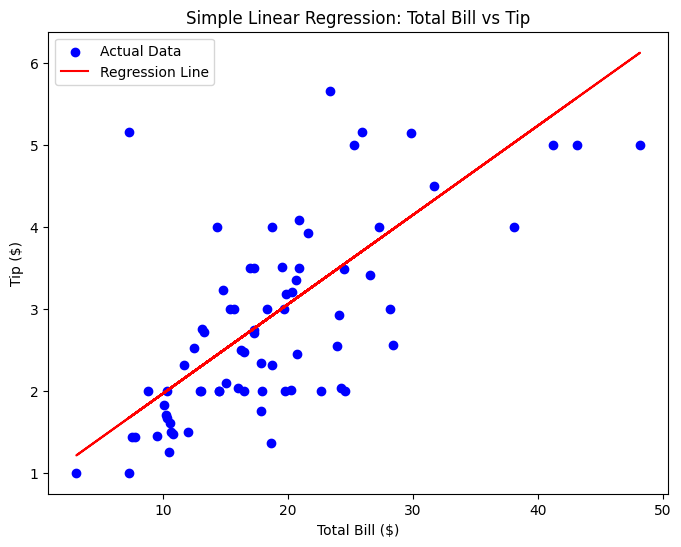

In [22]:
'''6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results'''

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the tips dataset
tips = sns.load_dataset("tips")

# Select "total_bill" as the feature and "tip" as the target variable
X = tips[["total_bill"]]
y = tips["tip"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print model's coefficients, intercept, and R-squared score
print(f"Model Coefficients: {model.coef_[0]:.4f}")
print(f"Model Intercept: {model.intercept_:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Visualize the results
plt.figure(figsize=(8, 6))

# Scatter plot for the actual data points
plt.scatter(X_test, y_test, color="blue", label="Actual Data")

# Plot the regression line
plt.plot(X_test, y_pred, color="red", label="Regression Line")

plt.title("Simple Linear Regression: Total Bill vs Tip")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend()

plt.show()


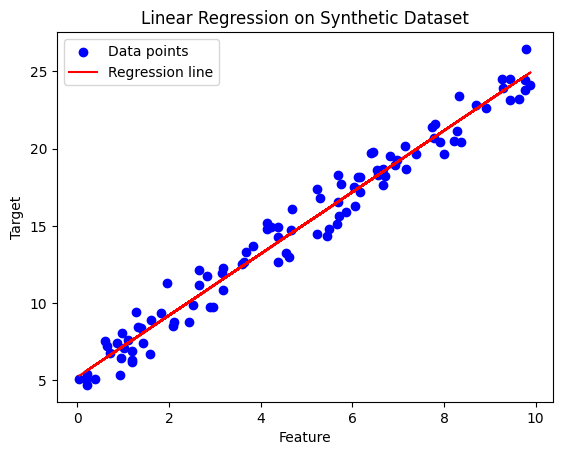

In [23]:
'''7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line.'''

from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature
y = 2 * X + 5 + np.random.randn(100, 1)  # Target variable with some noise

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict new values
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression on Synthetic Dataset')
plt.legend()
plt.show()


In [24]:
'''8. Write a Python script that pickles a trained linear regression model and saves it to a file'''
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature
y = 2 * X + 5 + np.random.randn(100, 1)  # Target variable with some noise

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Save the model to a file using pickle
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model has been pickled and saved as 'linear_regression_model.pkl'")


Model has been pickled and saved as 'linear_regression_model.pkl'


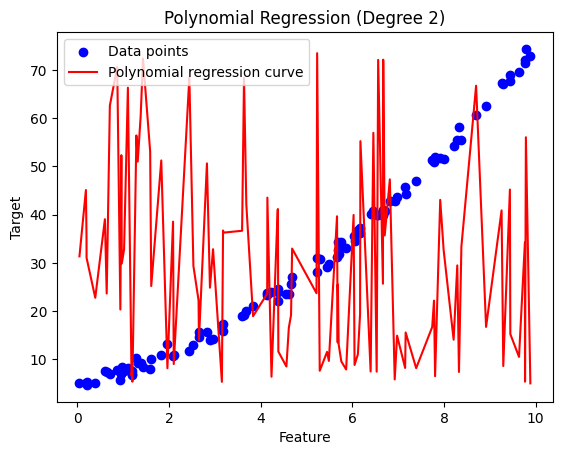

In [25]:
'''9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve.'''

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature
y = 0.5 * X**2 + 2 * X + 5 + np.random.randn(100, 1)  # Quadratic target with some noise

# Transform the features to include polynomial terms (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the trained model
y_pred = model.predict(X_poly)

# Plot the data points and the polynomial regression curve
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(np.sort(X.flatten()), model.predict(poly.transform(np.sort(X).reshape(-1, 1))), color='red', label='Polynomial regression curve')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()


In [26]:
'''10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
regression model to the data. Print the model's coefficient and intercept.'''
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Random feature values between 0 and 10
y = 3 * X + 7 + np.random.randn(100, 1)  # Linear target with some noise

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the model's coefficient and intercept
print("Model Coefficient:", model.coef_[0][0])
print("Model Intercept:", model.intercept_[0])


Model Coefficient: 2.9936935021402045
Model Intercept: 7.222151077447226


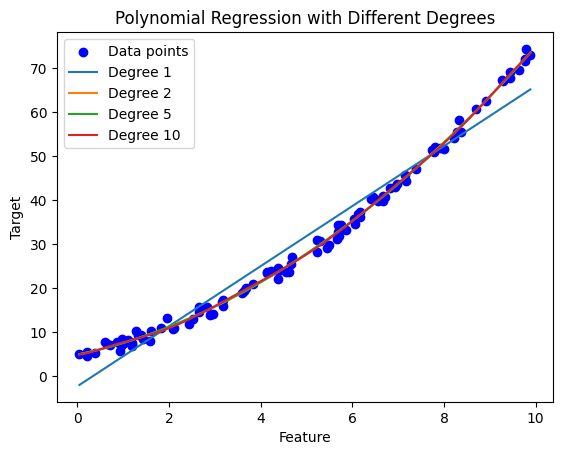

Degree 1 - Mean Squared Error: 14.39
Degree 2 - Mean Squared Error: 0.97
Degree 5 - Mean Squared Error: 0.97
Degree 10 - Mean Squared Error: 0.95


In [27]:
'''11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance.'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature
y = 0.5 * X**2 + 2 * X + 5 + np.random.randn(100, 1)  # Quadratic target with some noise

# Prepare to compare models
degrees = [1, 2, 5, 10]
mse_values = []

# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')

# Fit polynomial regression models of different degrees and calculate MSE
for degree in degrees:
    # Transform the features to include polynomial terms
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Create and train the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict using the trained model
    y_pred = model.predict(X_poly)

    # Calculate MSE
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Plot the regression curve for each model
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)
    plt.plot(X_range, y_range_pred, label=f'Degree {degree}')

# Display the plot and MSE values
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression with Different Degrees')
plt.legend()
plt.show()

# Print MSE values for comparison
for degree, mse in zip(degrees, mse_values):
    print(f'Degree {degree} - Mean Squared Error: {mse:.2f}')


In [28]:
'''12. Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score.'''
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 2) * 10  # Two features with random values between 0 and 10
y = 3 * X[:, 0] + 2 * X[:, 1] + 5 + np.random.randn(100)  # Linear relationship with noise

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the trained model
y_pred = model.predict(X)

# Print the model's coefficients, intercept, and R-squared score
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("R-squared Score:", r2_score(y, y_pred))


Model Coefficients: [2.95737004 2.00295751]
Model Intercept: 5.114503255617773
R-squared Score: 0.9912247006642919


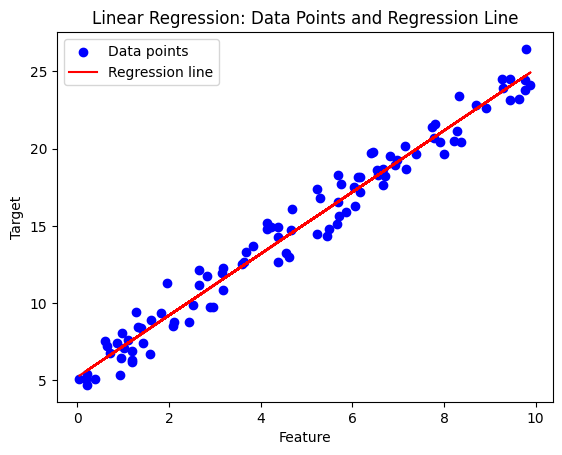

Model Coefficient: 1.9936935021402045
Model Intercept: 5.222151077447226


In [29]:
'''13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
regression line along with the data points.'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = 2 * X + 5 + np.random.randn(100, 1)  # Linear target with some noise

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the trained model
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, color='blue', label='Data points')  # Plot data points
plt.plot(X, y_pred, color='red', label='Regression line')  # Plot regression line
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression: Data Points and Regression Line')
plt.legend()
plt.show()

# Print model's coefficient and intercept
print("Model Coefficient:", model.coef_[0][0])
print("Model Intercept:", model.intercept_[0])


In [30]:
'''14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features.'''
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Generate synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 3) * 10  # Three features with random values between 0 and 10
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])

# Add a constant column to account for the intercept in the VIF calculation
df_with_const = add_constant(df)

# Calculate the VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = df_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Display the VIF values
print(vif_data)

    Feature       VIF
0     const  9.794980
1  Feature1  1.023269
2  Feature2  1.008587
3  Feature3  1.031479


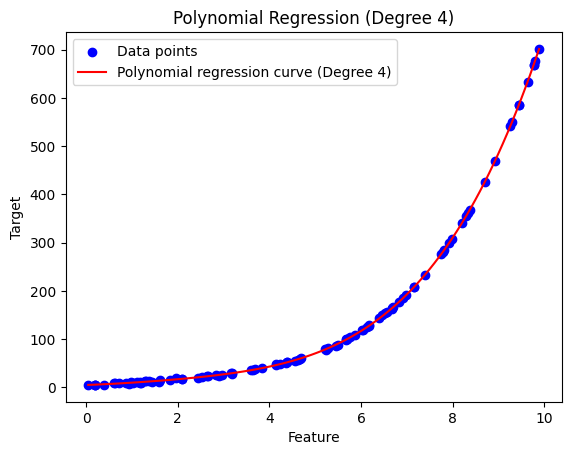

In [31]:
'''15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data for a polynomial relationship (degree 4)
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = 0.1 * X**4 - 0.5 * X**3 + 2 * X**2 + 3 * X + 5 + np.random.randn(100, 1)  # Polynomial relationship with noise

# Transform the features to include polynomial terms (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the trained model
y_pred = model.predict(X_poly)

# Plot the data points and the polynomial regression curve
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate X values for a smooth curve
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

# Plot data points and the regression curve
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_range, y_range_pred, color='red', label='Polynomial regression curve (Degree 4)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression (Degree 4)')
plt.legend()
plt.show()


In [32]:
'''16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model, and prints the R-squared score.'''
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Generate synthetic dataset with multiple features
np.random.seed(0)
X = np.random.rand(100, 3) * 10  # Three features with random values between 0 and 10
y = 2 * X[:, 0] + 3 * X[:, 1] - 4 * X[:, 2] + 7 + np.random.randn(100)  # Linear target with some noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a machine learning pipeline with StandardScaler and LinearRegression
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Train the model
pipeline.fit(X_train, y_train)

# Predict using the trained model
y_pred = pipeline.predict(X_test)

# Calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.992227501885936


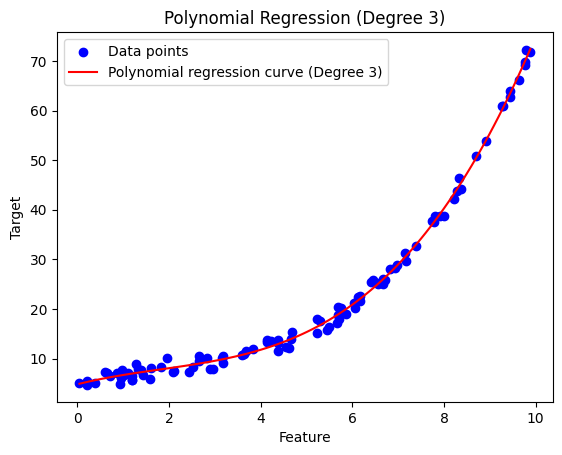

In [33]:
'''17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
regression curve.'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data for a polynomial relationship (degree 3)
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = 0.1 * X**3 - 0.5 * X**2 + 2 * X + 5 + np.random.randn(100, 1)  # Polynomial relationship with noise

# Transform the features to include polynomial terms (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the trained model
y_pred = model.predict(X_poly)

# Plot the data points and the polynomial regression curve
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate X values for a smooth curve
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

# Plot data points and the regression curve
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_range, y_range_pred, color='red', label='Polynomial regression curve (Degree 3)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.show()


In [34]:
'''18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients.'''
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Generate synthetic dataset with 5 features
np.random.seed(0)
X = np.random.rand(100, 5) * 10  # Five features with random values between 0 and 10
y = 3 * X[:, 0] + 2 * X[:, 1] - 1.5 * X[:, 2] + 0.5 * X[:, 3] + 1.5 * X[:, 4] + 5 + np.random.randn(100)  # Linear target with some noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score and model coefficients
print("R-squared Score:", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


R-squared Score: 0.9881174949226736
Model Coefficients: [ 2.99644816  1.99481282 -1.41145142  0.47028982  1.49796485]
Model Intercept: 4.740044661380253


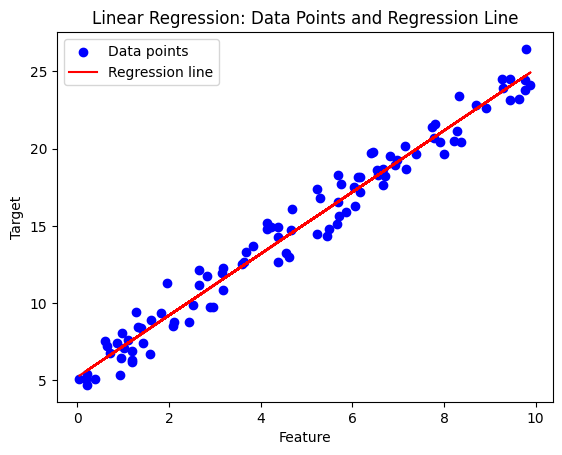

Model Coefficient: 1.9936935021402045
Model Intercept: 5.222151077447226


In [35]:
'''19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line.'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data for linear regression
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = 2 * X + 5 + np.random.randn(100, 1)  # Linear target with noise

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the trained model
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, color='blue', label='Data points')  # Plot data points
plt.plot(X, y_pred, color='red', label='Regression line')  # Plot regression line
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression: Data Points and Regression Line')
plt.legend()
plt.show()

# Print model's coefficient and intercept
print("Model Coefficient:", model.coef_[0][0])
print("Model Intercept:", model.intercept_[0])


In [36]:
'''20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.'''
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Generate synthetic dataset with 3 features
np.random.seed(0)
X = np.random.rand(100, 3) * 10  # Three features with random values between 0 and 10
y = 3 * X[:, 0] + 2 * X[:, 1] - 1.5 * X[:, 2] + 7 + np.random.randn(100)  # Linear target with some noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Print the model's coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


R-squared Score: 0.9886948633643943
Model Coefficients: [ 2.93624243  2.00282112 -1.46637066]
Model Intercept: 6.924610146098981


In [37]:
'''21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling'''
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

# Generate synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 3) * 10  # Three features with random values between 0 and 10
y = 3 * X[:, 0] + 2 * X[:, 1] - 1.5 * X[:, 2] + 7 + np.random.randn(100)  # Linear target with some noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Serialize the model using joblib
joblib.dump(model, 'linear_regression_model.joblib')

# Deserialize the model
loaded_model = joblib.load('linear_regression_model.joblib')

# Predict using the deserialized model
y_pred = loaded_model.predict(X_test)

# Print model's coefficients and intercept
print("Model Coefficients:", loaded_model.coef_)
print("Model Intercept:", loaded_model.intercept_)


Model Coefficients: [ 2.93624243  2.00282112 -1.46637066]
Model Intercept: 6.924610146098981


In [38]:
'''22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.'''
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load the Seaborn tips dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())

# Define the features and target variable
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = tips['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a column transformer to apply one-hot encoding to categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'day', 'time']),  # Categorical columns to one-hot encode
        ('num', 'passthrough', ['total_bill', 'size'])  # Numeric columns to pass through without transformation
    ])

# Create a pipeline with the column transformer and the linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the model's coefficients
# Note: We need to access the coefficients from the linear regression model after transformation
coefficients = pipeline.named_steps['regressor'].coef_
print("Model Coefficients:", coefficients)



   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Mean Squared Error: 0.8939195221609614
Model Coefficients: [ 0.00368691 -0.00368691  0.01595021 -0.01595021  0.24397333 -0.01861437
  0.08501165 -0.31037062 -0.22552999  0.22552999  0.08561436  0.20932895]


In [39]:
'''23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.'''
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate a synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 3) * 10  # Three features with random values between 0 and 10
y = 3 * X[:, 0] + 2 * X[:, 1] - 1.5 * X[:, 2] + 7 + np.random.randn(100)  # Linear target with some noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Ridge Regression model (with alpha=1.0)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict using both models
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate R-squared scores for both models
r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print R-squared scores and coefficients for both models
print("Linear Regression R-squared Score:", r2_linear)
print("Ridge Regression R-squared Score:", r2_ridge)
print("\nLinear Regression Coefficients:", linear_model.coef_)
print("Linear Regression Intercept:", linear_model.intercept_)

print("\nRidge Regression Coefficients:", ridge_model.coef_)
print("Ridge Regression Intercept:", ridge_model.intercept_)


Linear Regression R-squared Score: 0.9886948633643943
Ridge Regression R-squared Score: 0.9885767075082815

Linear Regression Coefficients: [ 2.93624243  2.00282112 -1.46637066]
Linear Regression Intercept: 6.924610146098981

Ridge Regression Coefficients: [ 2.931645    2.00061048 -1.46405246]
Ridge Regression Intercept: 6.945403360437993


In [40]:
'''24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
dataset.'''
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

# Generate a synthetic dataset
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=0)

# Create a Linear Regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validation R-squared scores for each fold
print("Cross-validation R-squared scores:", cv_scores)

# Print the mean R-squared score across all folds
print("Mean R-squared score:", np.mean(cv_scores))


Cross-validation R-squared scores: [0.99999814 0.99999846 0.99999806 0.99999755 0.99999819]
Mean R-squared score: 0.9999980810179121


Degree 1 Polynomial Regression R-squared Score: 0.9501
Degree 2 Polynomial Regression R-squared Score: 0.9998
Degree 3 Polynomial Regression R-squared Score: 0.9998
Degree 4 Polynomial Regression R-squared Score: 0.9998
Degree 5 Polynomial Regression R-squared Score: 0.9998


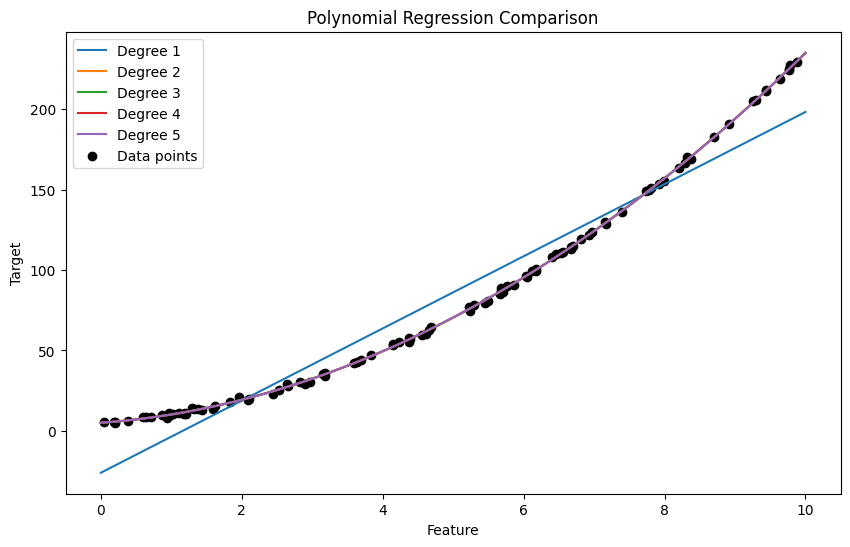

In [41]:
'''25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset with a non-linear relationship
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = 2 * X ** 2 + 3 * X + 5 + np.random.randn(100, 1)  # Polynomial target with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# List of polynomial degrees to evaluate
degrees = [1, 2, 3, 4, 5]

# Create a plot to visualize the results
plt.figure(figsize=(10, 6))

# Compare polynomial regression models of different degrees
for degree in degrees:
    # Transform features to polynomial features of the specified degree
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_poly_test)

    # Calculate and print the R-squared score
    r2 = r2_score(y_test, y_pred)
    print(f"Degree {degree} Polynomial Regression R-squared Score: {r2:.4f}")

    # Plot the regression curve
    X_range = np.linspace(0, 10, 100).reshape(-1, 1)
    X_poly_range = poly.transform(X_range)
    y_range = model.predict(X_poly_range)
    plt.plot(X_range, y_range, label=f'Degree {degree}')

# Plot the original data points
plt.scatter(X, y, color='black', label='Data points')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression Comparison')
plt.legend()
plt.show()
